# General analysis of Covid-19 in Hong Kong -- Part 1 analysis

In the beginning, let's import necessary library

In [1]:
#Import library
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt


Then we start from import the first dataset, which shows the general details of propable/confirmed cases of COVID-19 in Hong Kong.

In [2]:
url="https://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv"
ss=requests.get(url).content
covid =pd.read_csv(io.StringIO(ss.decode('utf-8')))
covid.to_csv('enhanced_sur_covid_19_eng.csv') 
covid

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed
...,...,...,...,...,...,...,...,...,...,...
4846,4847,04/09/2020,01/09/2020,F,46,NaN,To be provided,HK Resident,Imported case,Confirmed
4847,4848,04/09/2020,03/09/2020,F,18,NaN,To be provided,HK Resident,Imported case,Confirmed
4848,4849,04/09/2020,Asymptomatic,F,39,NaN,To be provided,HK Resident,Imported case,Confirmed
4849,4850,04/09/2020,18/08/2020,F,67,NaN,To be provided,HK Resident,Local case,Confirmed


In [3]:
#check the datatypes of each column
covid.dtypes

Case no.                              int64
Report date                          object
Date of onset                        object
Gender                               object
Age                                   int64
Name of hospital admitted           float64
Hospitalised/Discharged/Deceased     object
HK/Non-HK resident                   object
Case classification*                 object
Confirmed/probable                   object
dtype: object

In [4]:
#have a quick look at the date
covid['Report date'].unique()

array(['23/01/2020', '24/01/2020', '26/01/2020', '29/01/2020',
       '30/01/2020', '31/01/2020', '01/02/2020', '02/02/2020',
       '04/02/2020', '05/02/2020', '06/02/2020', '07/02/2020',
       '09/02/2020', '10/02/2020', '11/02/2020', '12/02/2020',
       '13/02/2020', '14/02/2020', '16/02/2020', '17/02/2020',
       '18/02/2020', '19/02/2020', '20/02/2020', '22/02/2020',
       '23/02/2020', '24/02/2020', '25/02/2020', '26/02/2020',
       '27/02/2020', '28/02/2020', '29/02/2020', '01/03/2020',
       '02/03/2020', '04/03/2020', '06/03/2020', '07/03/2020',
       '08/03/2020', '09/03/2020', '10/03/2020', '11/03/2020',
       '12/03/2020', '13/03/2020', '14/03/2020', '15/03/2020',
       '16/03/2020', '17/03/2020', '18/03/2020', '19/03/2020',
       '20/03/2020', '21/03/2020', '22/03/2020', '23/03/2020',
       '24/03/2020', '25/03/2020', '26/03/2020', '27/03/2020',
       '28/03/2020', '29/03/2020', '30/03/2020', '31/03/2020',
       '01/04/2020', '02/04/2020', '03/04/2020', '04/04

First calculate the number of cases for each date. Then, we sort the dataframe by dates.

In [5]:
grouped_covid = covid.groupby('Report date')
grouped_covid = grouped_covid.agg({'Case no.': "nunique"})
grouped_covid = grouped_covid.reset_index()
grouped_covid = grouped_covid.rename(columns={'Case no.': 'Number_of_Cases'})
grouped_covid['Report date'] = pd.to_datetime(grouped_covid['Report date'], format='%d/%m/%Y')
grouped_covid = grouped_covid.sort_values(by=['Report date'])
grouped_covid

,Report date,Number_of_Cases
133,2020-01-23,2
140,2020-01-24,3
152,2020-01-26,3
169,2020-01-29,2
176,2020-01-30,2
...,...,...
186,2020-08-31,9
7,2020-09-01,12
14,2020-09-02,8
18,2020-09-03,8


now we can plot the result using this dataset:

Text(0.5, 0, 'Date')

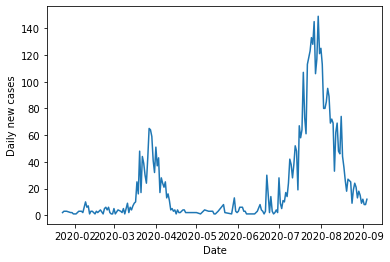

In [6]:
#plot daily new cases
import matplotlib.dates as mdates
fig = plt.figure()
ax = plt.axes()
ax.fmt_xdata = mdates.DateFormatter('%m') 
ax.plot(grouped_covid['Report date'], grouped_covid['Number_of_Cases']);

ax.set_ylabel('Daily new cases')
ax.set_xlabel('Date')



Next we gather the information of cases based on gender. The number of cases are grouped based on gender.

In [7]:
grouped_covid2 = covid.groupby('Gender')
grouped_covid2 = grouped_covid2.agg({'Case no.': "nunique"})
grouped_covid2 = grouped_covid2.reset_index()
grouped_covid2 = grouped_covid2.rename(columns={'Case no.': 'Number_of_Cases'})
grouped_covid2

,Gender,Number_of_Cases
0,F,2429
1,M,2422


We plot the gender pie chart:

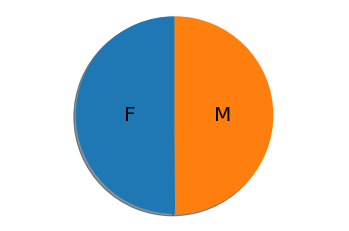

In [8]:
#plot gender pie chart

labels = grouped_covid2['Gender']
sizes = grouped_covid2['Number_of_Cases']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
        shadow=True, startangle=90,textprops={'fontsize': 20},labeldistance=0.4)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax1.set_title('Gender distribution of confirmed cases in Hong Kong')

plt.show()

Now we do Age plot. there are 5 categories, and we group the numbers based on the age category.

In [9]:
covid_copy = covid[['Gender','Age']]
bins = [-1, 2, 18, 35, 65, np.inf]
names = ['<2', '2-18', '18-35', '35-65', '65+']
covid_copy
covid_copy['Age_Range'] = pd.cut(np.array(covid_copy['Age']), bins, labels=names)
grouped_covid3 = covid_copy.groupby('Age_Range')
grouped_covid3 = grouped_covid3.agg({'Gender': "count"})
grouped_covid3 = grouped_covid3.rename(columns={'Gender': 'Number_of_Cases'})
grouped_covid3 = grouped_covid3.reset_index()
grouped_covid3

<ipython-input-9-57c720ae8afb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_copy['Age_Range'] = pd.cut(np.array(covid_copy['Age']), bins, labels=names)


,Age_Range,Number_of_Cases
0,<2,58
1,2-18,401
2,18-35,1301
3,35-65,2341
4,65+,750


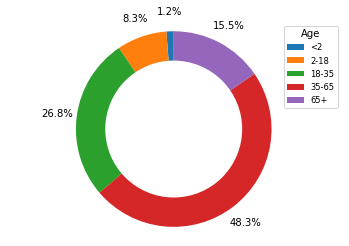

In [10]:
#plot age pie chart

labels = grouped_covid3['Age_Range']
sizes = grouped_covid3['Number_of_Cases']
fig2, ax2 = plt.subplots()
ax2.pie(sizes,  autopct='%1.1f%%',pctdistance=1.2, startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax2.set_title('Case classification plot of covid-19 cases in Hong Kong')
plt.legend(title='Age',labels =labels,loc=1,fontsize='small')

plt.show()

Next, we have a quick look on the case classification data

In [11]:
grouped_covid4 = covid.groupby('Case classification*')
grouped_covid4 = grouped_covid4.agg({'Gender': "count"})
grouped_covid4 = grouped_covid4.rename(columns={'Gender': 'Number_of_Cases'})
grouped_covid4 = grouped_covid4.reset_index()
grouped_covid4 = grouped_covid4.reindex([2, 1, 0, 3,5,4]) # reorder for easier plotting
grouped_covid4

,Case classification*,Number_of_Cases
2,Epidemiologically linked with possibly local case,62
1,Epidemiologically linked with local case,2169
0,Epidemiologically linked with imported case,31
3,Imported case,1161
5,Possibly local case,103
4,Local case,1325


<Figure size 108x93.6 with 0 Axes>

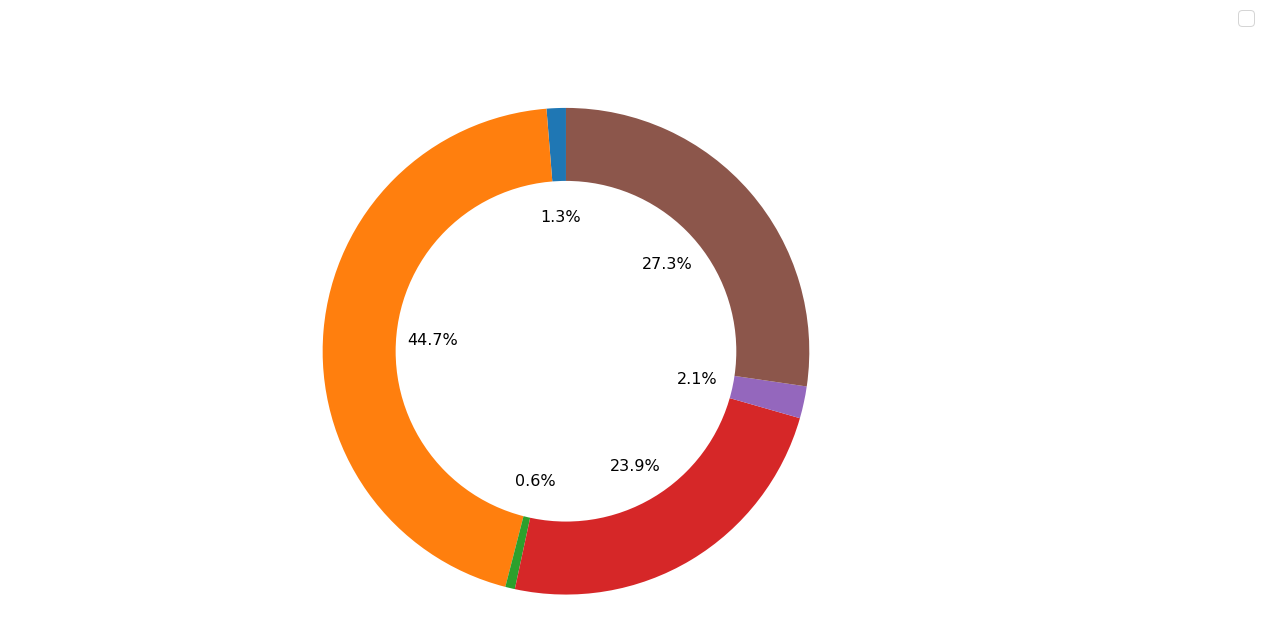

In [36]:
#plot case classification pie chart
import pylab, numpy
labels = grouped_covid4['Case classification*']
sizes = grouped_covid4['Number_of_Cases']
figLegend = pylab.figure(figsize = (1.5,1.3))

fig2, ax2 = plt.subplots(figsize=(20,10))
ax2.pie(sizes, autopct='%1.1f%%',pctdistance=0.55, startangle=90,textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax2.axis('equal') 
#ax2.set_title('Case classification plot of covid-19 cases in Hong Kong')
#plt.legend(labels =labels,loc='center',fontsize=60,framealpha=1)
plt.savefig('Case Classification_legend.png')


pylab.figlegend(*ax2.get_legend_handles_labels(),loc=1,fontsize=20)
figLegend.savefig("legend.png")


<ipython-input-16-a356620fbeed>:8: UserWarning: Legend does not support [<matplotlib.patches.Wedge object at 0x7f9aa459f7f0>, <matplotlib.patches.Wedge object at 0x7f9aa45aaaf0>, <matplotlib.patches.Wedge object at 0x7f9aa45aadc0>, <matplotlib.patches.Wedge object at 0x7f9aa440a760>, <matplotlib.patches.Wedge object at 0x7f9aa440ad60>, <matplotlib.patches.Wedge object at 0x7f9aa45aef40>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  figlegend.legend(lines,labels, 'center')
<ipython-input-16-a356620fbeed>:8: UserWarning: Legend does not support [Text(-0.04415565020169708, 1.0991134056844478, ''), Text(-1.095952702055754, 0.09427446556036076, ''), Text(-0.25275313673395433, -1.0705680043188042, ''), Text(0.565656209108792, -0.9434156311492146, ''), Text(1.0753513050368464, -0.23155900059283235, ''), Text(0.8322568502660134, 0.7192694454690083, '')] instances.
A p

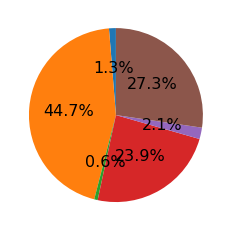

<Figure size 216x144 with 0 Axes>

In [16]:
import pylab
labels = grouped_covid4['Case classification*']
sizes = grouped_covid4['Number_of_Cases']
fig = pylab.figure()
figlegend = pylab.figure(figsize=(3,2))
ax = fig.add_subplot(111)
lines = ax.pie(sizes, autopct='%1.1f%%',pctdistance=0.55, startangle=90,textprops={'fontsize': 16})
figlegend.legend(lines,labels, 'center')
fig.show()
figlegend.show()
figlegend.savefig('legend.png')

Finally, we do a quick search of the number on Asymptomatic cases.

In [98]:
covid['Date of onset'].unique()

array(['21/01/2020', '18/01/2020', '20/01/2020', '23/01/2020',
       '25/01/2020', '28/01/2020', '22/01/2020', '29/01/2020',
       '01/02/2020', '30/01/2020', '04/02/2020', '26/01/2020',
       '03/02/2020', '02/02/2020', '07/02/2020', '08/02/2020',
       '05/02/2020', '31/01/2020', '12/02/2020', '11/02/2020',
       '14/02/2020', '10/02/2020', '18/02/2020', '13/02/2020',
       '20/02/2020', '19/02/2020', '24/02/2020', 'Asymptomatic',
       '17/02/2020', '25/02/2020', '16/02/2020', '29/02/2020',
       '15/02/2020', '28/02/2020', '23/02/2020', '04/03/2020',
       '06/03/2020', '07/03/2020', '09/03/2020', '08/03/2020',
       '10/03/2020', '03/03/2020', '12/03/2020', '02/03/2020',
       '11/03/2020', '13/03/2020', '14/03/2020', '15/03/2020',
       '05/03/2020', '16/03/2020', '17/03/2020', '18/03/2020',
       '19/03/2020', '20/03/2020', '21/03/2020', '22/03/2020',
       '23/03/2020', '24/03/2020', '25/03/2020', '26/03/2020', 'January',
       '27/03/2020', '28/03/2020', '29/03/

In [99]:
grouped_covid5 = covid.groupby('Date of onset')
grouped_covid5 = grouped_covid5.agg({'Gender': "count"})
grouped_covid5 = grouped_covid5.rename(columns={'Gender': 'Number_of_Cases'})
print(grouped_covid5['Number_of_Cases']['Asymptomatic'])
print(grouped_covid5['Number_of_Cases']['Pending'])
print(grouped_covid5['Number_of_Cases']['Unknown'])

1120
45
25


In [43]:
covid_deceased = covid.loc[covid['Hospitalised/Discharged/Deceased'] == 'Deceased']
print(covid_deceased.Age.unique())


[39 70 80 76 75 78 72 55 92 74 91 95 83 87 90 94 82 89 86 85 88 77 64 63
 71 84 60 79 81 66 93 69 65 98 59]


In [44]:
covid_copy = covid_deceased[['Gender','Age']]
bins = [-1, 2, 18, 35, 65, np.inf]
names = ['<2', '2-18', '18-35', '35-65', '65+']
covid_copy
covid_copy['Age_Range'] = pd.cut(np.array(covid_copy['Age']), bins, labels=names)
grouped_covid6 = covid_copy.groupby('Age_Range')
grouped_covid6 = grouped_covid6.agg({'Gender': "count"})
grouped_covid6 = grouped_covid6.rename(columns={'Gender': 'Number_of_Cases'})
grouped_covid6 = grouped_covid6.reset_index()
grouped_covid6

<ipython-input-44-198308f286df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_copy['Age_Range'] = pd.cut(np.array(covid_copy['Age']), bins, labels=names)


,Age_Range,Number_of_Cases
0,<2,0
1,2-18,0
2,18-35,0
3,35-65,9
4,65+,85


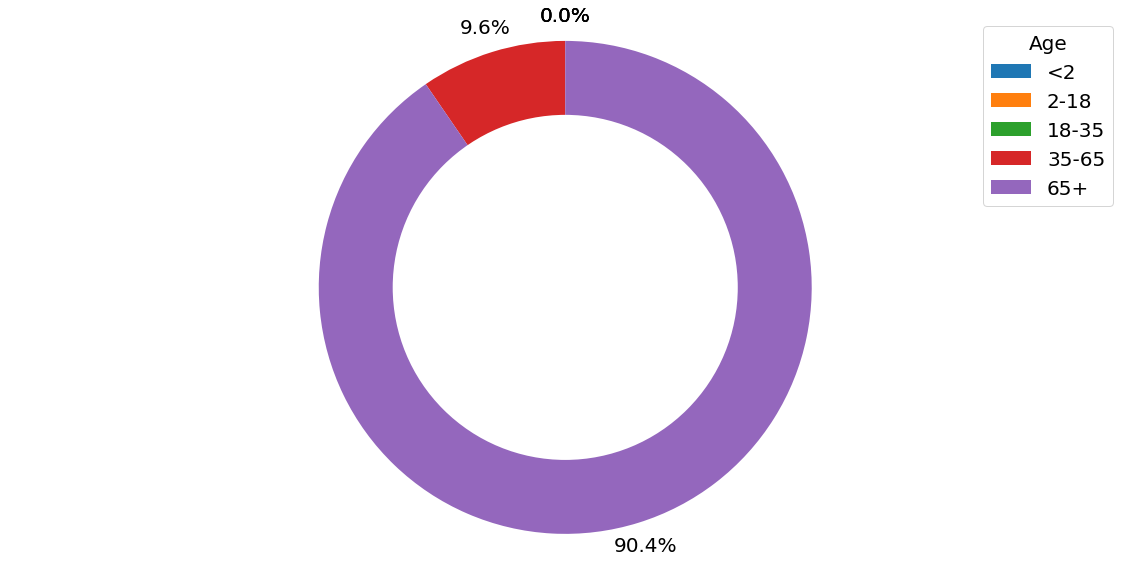

In [55]:
#plot age pie chart

labels = grouped_covid6['Age_Range']
sizes = grouped_covid6['Number_of_Cases']
fig2, ax2 = plt.subplots(figsize=(20,10))
ax2.pie(sizes,  autopct='%1.1f%%',pctdistance=1.1, startangle=90,textprops={'fontsize': 20})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax2.set_title('Case classification plot of covid-19 cases in Hong Kong')
plt.legend(title='Age',title_fontsize=20, labels =labels,loc=1,fontsize=20)

plt.show()